In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Dataset\1.jpg
Dataset\10.jpg
Dataset\100.jpg
Dataset\101.jpg
Dataset\102.jpg
Dataset\103.jpg
Dataset\104.jpg
Dataset\105.jpg
Dataset\106.jpg
Dataset\107.jpg
Dataset\108.jpg
Dataset\109.jpg
Dataset\11.jpg
Dataset\110.jpg
Dataset\111.jpg
Dataset\112.jpg
Dataset\113.jpg
Dataset\114.jpg
Dataset\115.jpg
Dataset\116.jpg
Dataset\117.jpg
Dataset\118.jpg
Dataset\119.jpg
Dataset\12.jpg
Dataset\120.jpg
Dataset\13.jpg
Dataset\14.jpg
Dataset\15.jpg
Dataset\16.jpg
Dataset\17.jpg
Dataset\18.jpg
Dataset\19.jpg
Dataset\2.jpg
Dataset\20.jpg
Dataset\21.jpg
Dataset\22.jpg
Dataset\23.jpg
Dataset\24.jpg
Dataset\25.jpg
Dataset\26.jpg
Dataset\27.jpg
Dataset\28.jpg
Dataset\29.jpg
Dataset\3.jpg
Dataset\30.jpg
Dataset\31.jpg
Dataset\32.jpg
Dataset\33.jpg
Dataset\34.jpg
Dataset\35.jpg
Dataset\36.jpg
Dataset\37.jpg
Dataset\38.jpg
Dataset\39.jpg
Dataset\4.jpg
Dataset\40.jpg
Dataset\41.jpg
Dataset\42.jpg
Dataset\43.jpg
Dataset\44.jpg
Dataset\45.jpg
Dataset\46.jpg
Dataset\47.jpg
Dataset\48.jpg
Dataset\49.jpg
Dataset\

In [23]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
train_images = sorted(os.listdir('Dataset'))

### Constructing the dataset in the required format

In [4]:
train_image = []
for im in train_images:
    img = image.load_img('Dataset/'+ im, target_size=(64,64), color_mode= 'grayscale')
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
train_df = np.array(train_image)

### Defining a plot function

In [5]:
import matplotlib.pyplot as plt

def show_img(dataset):
    f, ax = plt.subplots(1,5)
    f.set_size_inches(40, 20)
    for i in range(5,10):
        ax[i-5].imshow(dataset[i].reshape(64,64), cmap='gray')
    plt.show()

### Defining a function for Noice addition. 0.07 is multiplied as it is the fraction of noice that we want in our picture.

In [6]:
def add_noice(image):
    row,col,ch= image.shape
    mean = 0
    sigma = 1
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss*0.07
    return noisy

In [7]:
noised_df= []

for img in train_df:
    noisy= add_noice(img)
    noised_df.append(noisy)

In [8]:
noised_df= np.array(noised_df)

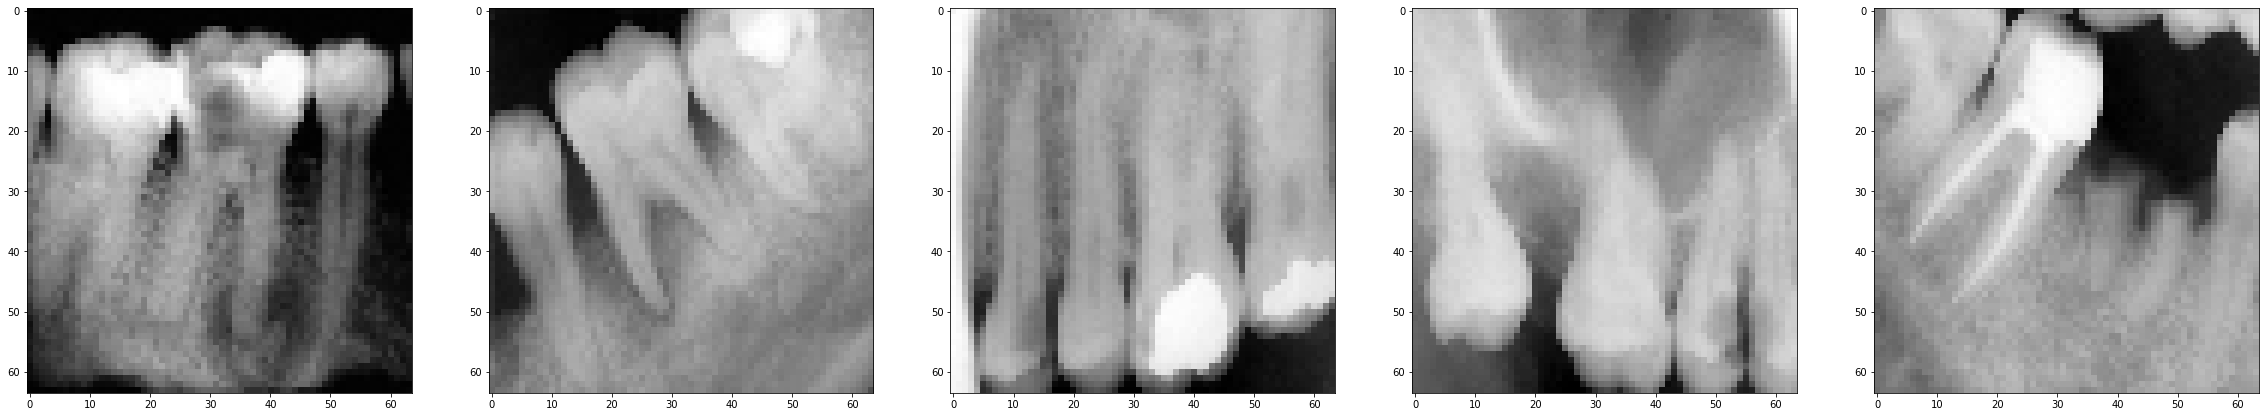

In [9]:
show_img(train_df)

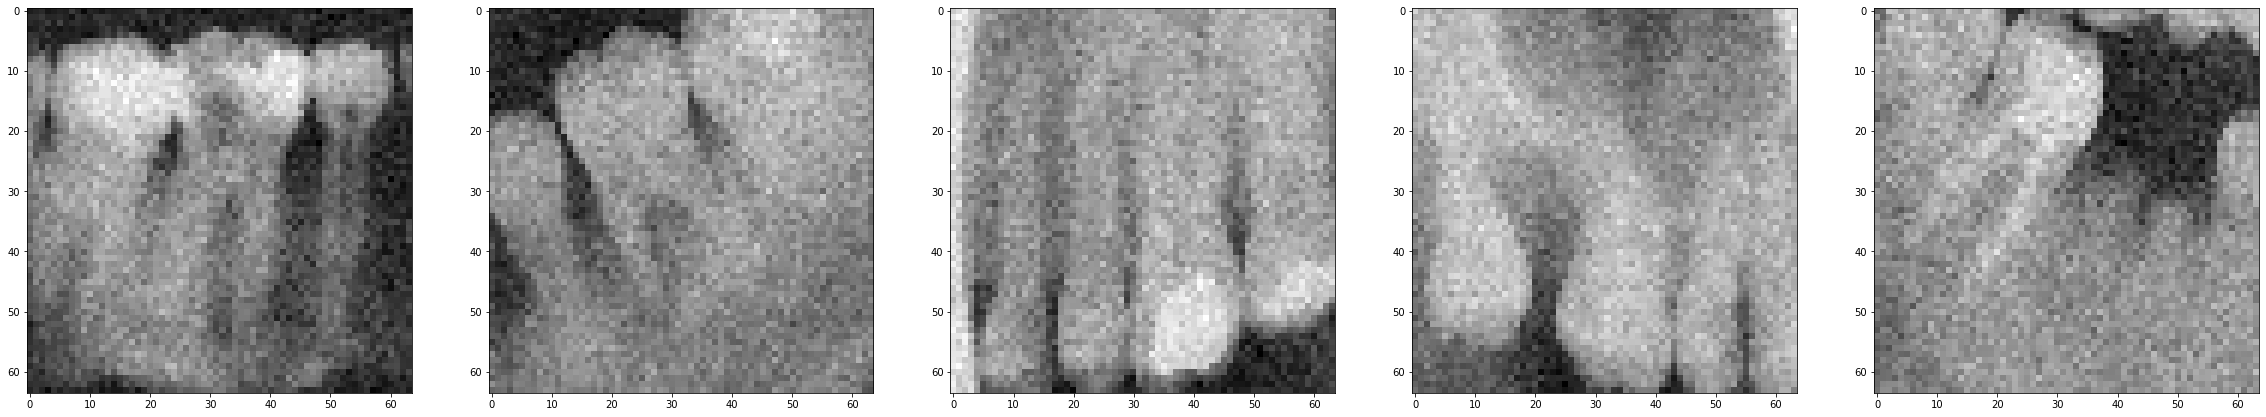

In [10]:
show_img(noised_df)

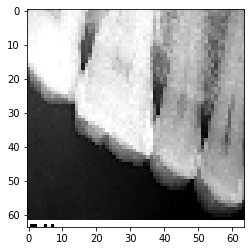

In [25]:
plt.imshow(train_df[0],cmap='gray')

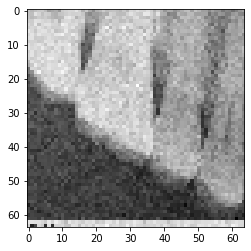

In [26]:
plt.imshow(noised_df[0],cmap='gray')

In [11]:
noised_df.shape

(120, 64, 64, 1)

In [12]:
train_df.shape

(120, 64, 64, 1)

In [13]:
xnoised= noised_df[0:100]
xtest= noised_df[100:]

In [14]:
xnoised.shape

(100, 64, 64, 1)

In [42]:
xtest.shape

(20, 64, 64, 1)

### Defining the model architecture as per the design suggested in the paper

In [51]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D ,UpSampling2D, Flatten, Input
from keras import backend as K
from tensorflow.keras.optimizers import SGD,Adam, Adadelta, Adagrad

def autoencoder():
    
    input_img = Input(shape=(64,64,1), name='image_input')
    
    #enoder 
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
    x = MaxPooling2D((2,2), padding='same', name='pool1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv2')(x)
    x = MaxPooling2D((2,2), padding='same', name='pool2')(x)
    
    #decoder
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv3')(x)
    x = UpSampling2D((2,2), name='upsample1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv4')(x)
    x = UpSampling2D((2,2), name='upsample2')(x)
    x = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(x)
    
    #model
    autoencoder = Model(inputs=input_img, outputs=x)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    return autoencoder

In [52]:
model= autoencoder()
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 64, 64, 1)]       0         
                                                                 
 Conv1 (Conv2D)              (None, 64, 64, 64)        640       
                                                                 
 pool1 (MaxPooling2D)        (None, 32, 32, 64)        0         
                                                                 
 Conv2 (Conv2D)              (None, 32, 32, 64)        36928     
                                                                 
 pool2 (MaxPooling2D)        (None, 16, 16, 64)        0         
                                                                 
 Conv3 (Conv2D)              (None, 16, 16, 64)        36928     
                                                                 
 upsample1 (UpSampling2D)    (None, 32, 32, 64)        0   

In [53]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
with tf.device('/device:GPU:0'):
    
    model.fit(xnoised, xnoised, epochs=40, batch_size=10,validation_data=(xtest, xtest))

Epoch 1/40
10/10 [==============================] - 3s 224ms/step - loss: 0.6617 - val_loss: 0.6136
Epoch 2/40
10/10 [==============================] - 2s 194ms/step - loss: 0.6011 - val_loss: 0.5884
Epoch 3/40
10/10 [==============================] - 2s 188ms/step - loss: 0.5840 - val_loss: 0.5851
Epoch 4/40
10/10 [==============================] - 2s 190ms/step - loss: 0.5767 - val_loss: 0.5757
Epoch 5/40
10/10 [==============================] - 2s 196ms/step - loss: 0.5723 - val_loss: 0.5722
Epoch 6/40
10/10 [==============================] - 2s 195ms/step - loss: 0.5722 - val_loss: 0.5726
Epoch 7/40
10/10 [==============================] - 2s 187ms/step - loss: 0.5702 - val_loss: 0.5682
Epoch 8/40
10/10 [==============================] - 2s 190ms/step - loss: 0.5670 - val_loss: 0.5683
Epoch 9/40
10/10 [==============================] - 2s 191ms/step - loss: 0.5649 - val_loss: 0.5657
Epoch 10/40
10/10 [==============================] - 2s 189ms/step - loss: 0.5633 - val_loss: 0.5645

In [55]:
xtrain= train_df[100:]

## Plotting the predictions.

### First row:   Original image
### Second row:  Noice image
### Third row:   Denoised image using Autoencoder
### Fourth row:  Median filter image

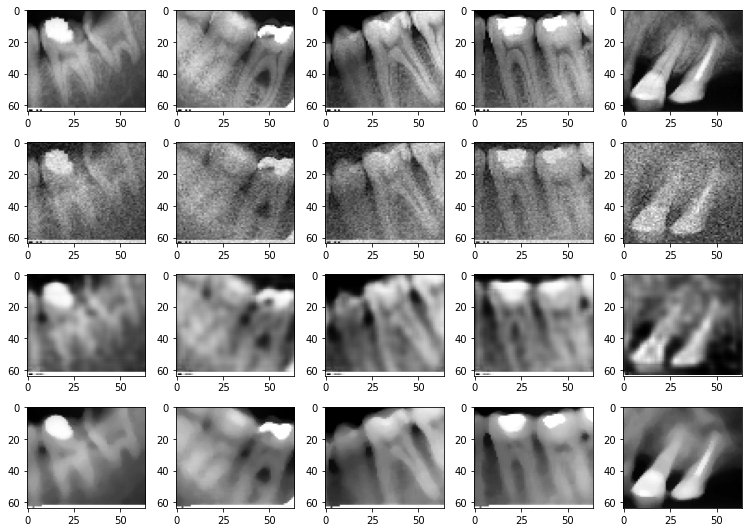

In [56]:
import cv2

pred= model.predict(xtest[:5])
def plot_predictions(y_true, y_pred):    
    f, ax = plt.subplots(4, 5)
    f.set_size_inches(10.5,7.5)
    for i in range(5):
        ax[0][i].imshow(np.reshape(xtrain[i], (64,64)), aspect='auto', cmap='gray')
        ax[1][i].imshow(np.reshape(y_true[i], (64,64)), aspect='auto', cmap='gray')
        ax[2][i].imshow(np.reshape(y_pred[i], (64,64)), aspect='auto', cmap='gray')
        ax[3][i].imshow(cv2.medianBlur(xtrain[i], (5)), aspect='auto', cmap='gray')
       
    plt.tight_layout()
plot_predictions(xtest[:5], pred[:5])

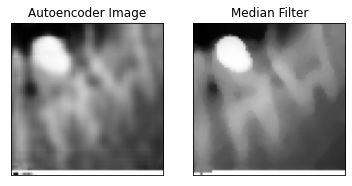

In [57]:
new_image = cv2.medianBlur(xtrain[0], (5))
plt.figure(figsize=(6,3))
plt.subplot(121)
plt.imshow(pred[0].reshape(64,64), cmap='gray')
plt.title('Autoencoder Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(new_image, cmap='gray')
plt.title('Median Filter')
plt.xticks([])
plt.yticks([])
plt.show()

In [58]:
from math import log10, sqrt 
  
def PSNR(original, denoiced): 
    mse = np.mean((original - denoiced) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
value1 = PSNR(xtest[0], new_image)
value2 = PSNR(xtest[0], pred[0])

print(f"PSNR value for Denoised image is {value2} dB while for Median filtered image is {value1} dB")

PSNR value for Denoised image is 69.97199193473806 dB while for Median filtered image is 58.4778011878757 dB
